# Lab 2 - Convex vs. Concave Algorithm
## By: Hudson Arney & Carson Willms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import pandas as pd
from scipy.stats import linregress
import random

In [2]:
def cross_product(p1, p2):
        return p1[0] * p2[1] - p1[1] * p2[0]

In [3]:
def is_convex(dot_list):
    if len(dot_list) < 3:
        return "ERROR"

    prev_cross_product = 0

    for i in range(len(dot_list)):
        i1 = dot_list[i]
        i2 = dot_list[(i + 1) % len(dot_list)]
        i3 = dot_list[(i + 2) % len(dot_list)]

        edge1 = (i2[0] - i1[0], i2[1] - i1[1])
        edge2 = (i3[0] - i2[0], i3[1] - i2[1])

        current_cross_product = cross_product(edge1, edge2)
        # Skip collinear points
        if current_cross_product == 0:
            continue

        if prev_cross_product == 0:
            prev_cross_product = current_cross_product
            
        # Cross products with different signs indicate concavity
        elif prev_cross_product * current_cross_product < 0:
            return False

    return True

In [4]:
def generate_random_convex_shape(num_points):
    if num_points < 3:
        raise ValueError("Number of points should be at least 3 for a shape.")

    angles = np.linspace(0.25, 2 * np.pi, num_points)
    x = np.cos(angles)
    y = np.sin(angles)
    
    if is_convex(list(zip(x, y))):
        return list(zip(x, y))
    else:
        return None

In [17]:
def generate_random_concave_shape(num_points):
    if num_points < 4:
        raise ValueError("Number of points should be at least 4 for a concave shape.")
    
    radius = 1.0
    theta = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    
    x[num_points - 2] = 0.0
    y[num_points - 2] = 0.0

    if not is_convex(list(zip(x, y))):
        return list(zip(x, y))
    else:
        return None

In [6]:
def create_random_shapes(num_points_list):
    shape_list = []
    for num_points in num_points_list:
        convex_shape = generate_random_convex_shape(num_points)
        concave_shape = generate_random_concave_shape(num_points)

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        x, y = zip(*convex_shape)
        plt.plot(*zip(*convex_shape), linestyle='-', color='green')
        plt.plot([x[-1], x[0]], [y[-1], y[0]], linestyle='-', color='green')
        plt.title(f"Convex Shape ({num_points} points)")

        plt.subplot(1, 2, 2)
        x, y = zip(*concave_shape)
        plt.plot(*zip(*concave_shape), linestyle='-', color='blue')
        plt.plot([x[-1], x[0]], [y[-1], y[0]], linestyle='-', color='blue')
        plt.title(f"Concave Shape ({num_points} points)")

        plt.tight_layout()
        plt.show()
        shape_list.append({"Convex": convex_shape, "Concave": concave_shape})

    return shape_list

In [18]:
def plot_shape(points, shape_name, result, color):
    if(len(points) > 0):
        x, y = zip(*points)
        plt.figure()
        plt.plot(x, y, marker='o', linestyle='-', color=color)
        plt.plot([x[-1], x[0]], [y[-1], y[0]], linestyle='-', color=color)
        plt.title(f"{shape_name} ({'Convex' if result else 'Concave' if result is not None else 'ERROR'})")
        plt.grid(True)
    

In [19]:
shapes = {
    "Empty List": [], 
    "Line": [(0, 0), (1, 1)],
    "Circle": [(0.5 * np.cos(theta), 0.5 * np.sin(theta)) for theta in np.linspace(0, 2 * np.pi, 100)],
    "Rectangle": [(0, 0), (2, 0), (2, 1), (0, 1)],
    "Star": [(0, 0.5), (0.118, 0.118), (0.5, 0), (0.118, -0.118), (0, -0.5),
         (-0.118, -0.118), (-0.5, 0), (-0.118, 0.118), (0, 0.5)],
    "Pentagon": [(0, 0.5), (0.4755, 0.1545), (0.2939, -0.4045), (-0.2939, -0.4045), (-0.4755, 0.1545)],
    "Nothing Polygon": [(0, 0), (0, 0), (0, 0)], 
    "Concave Triangle": [(0, 0), (1, 0), (0.5, 1)], 
    "Concave Crescent Moon": [(0, 0), (2, 0), (1.5, 1), (1, 0.5), (0.5, 1)],
    "Convex Polygon": [(0, 0), (1, 1), (3, 1), (4, 0), (3, 2), (1, 2)],
    "Collinear Points": [(0, 0), (1, 1), (2, 2), (3, 3)] 
}

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

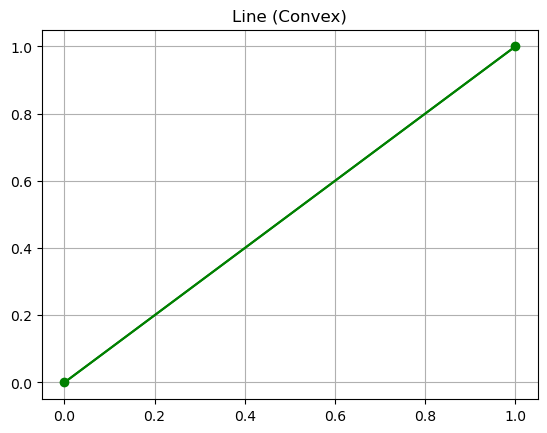

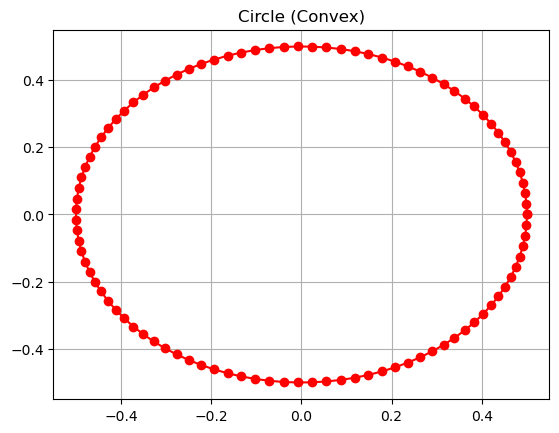

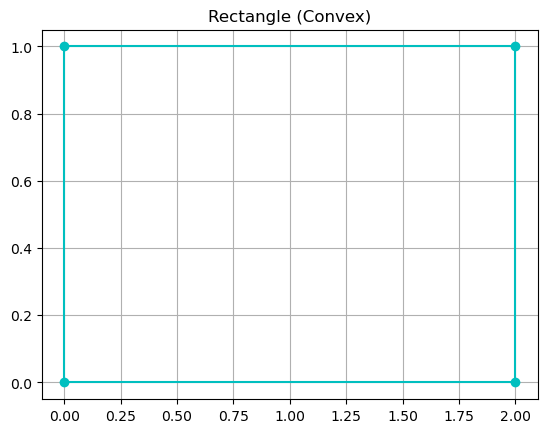

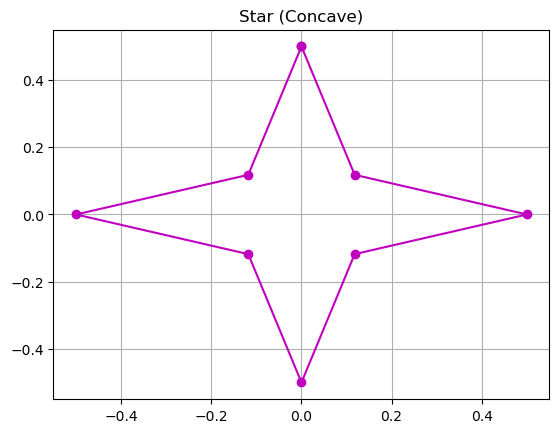

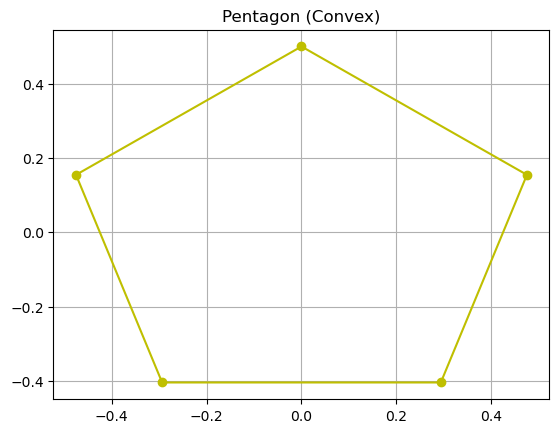

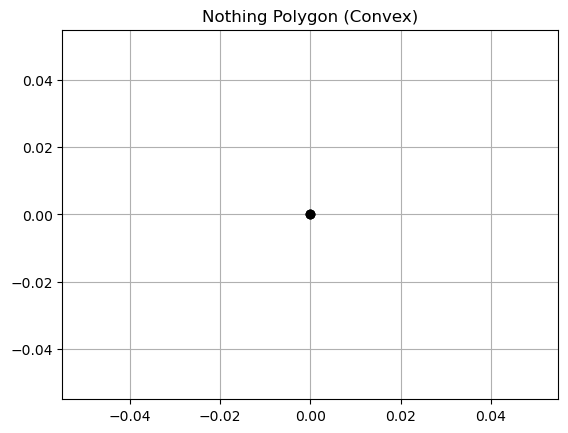

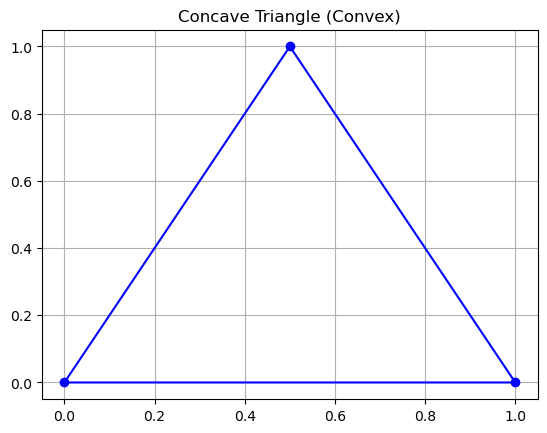

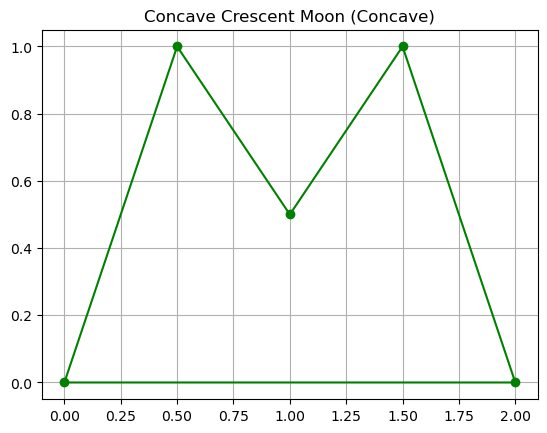

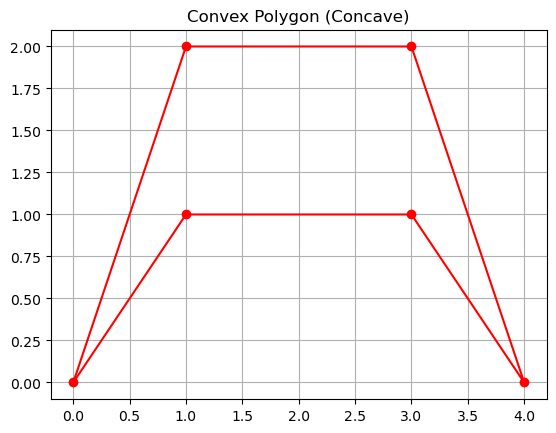

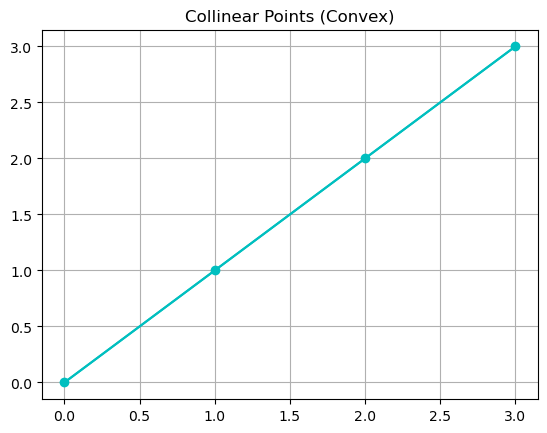

In [9]:
for i, (shape_name, shape_points) in enumerate(shapes.items()):
    result = is_convex(shape_points)
    color = colors[i % len(colors)]
    plot_shape(shape_points, shape_name, result, color)
    plt.show()

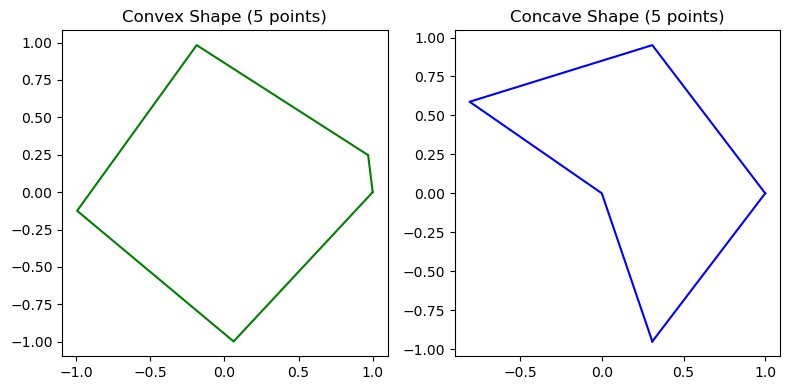

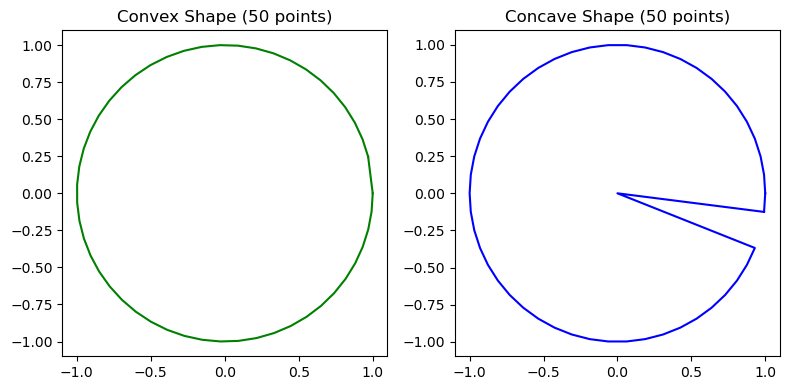

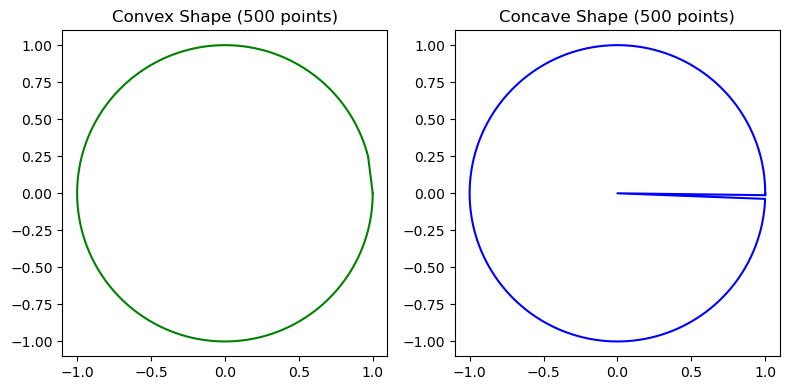

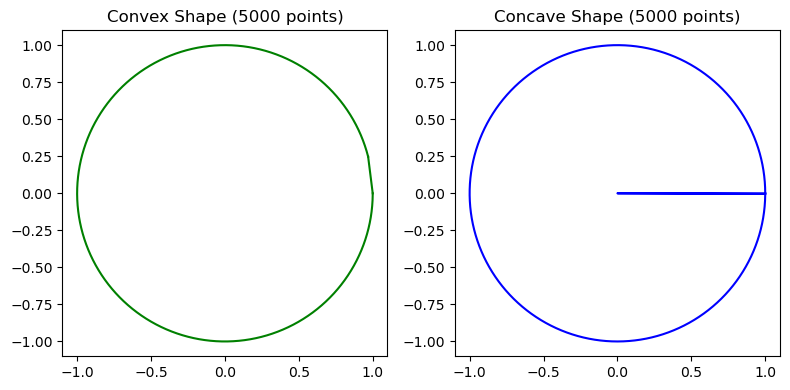

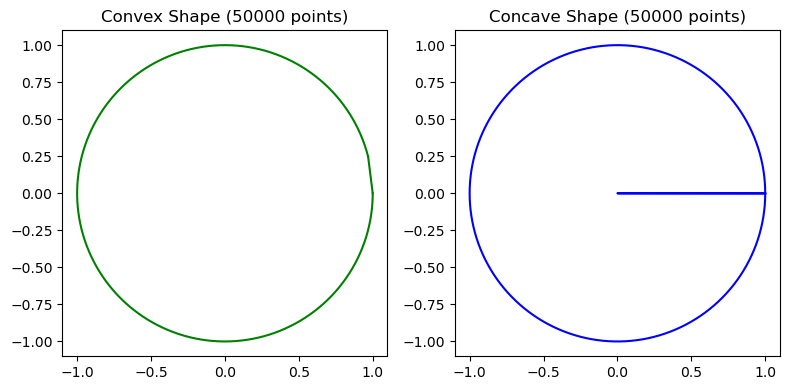

In [20]:
num_points_list = [5, 50, 500, 5000, 50000]
random_shapes = create_random_shapes(num_points_list)

In [11]:
def benchmark_algorithm(shapes_list):
    execution_times = {"Shape": [], "Points": [], "Time (μs)": []}

    for shape_dict in shapes_list:
        for shape_name, shape_points in shape_dict.items():
            num_points = len(shape_points)

            # Measure execution time
            start_time = time.perf_counter()
            is_convex(shape_points)
            end_time = time.perf_counter()

            execution_time = (end_time - start_time) * 1000000  # microseconds

            # Store the results
            execution_times["Shape"].append(shape_name)
            execution_times["Points"].append(num_points)
            execution_times["Time (μs)"].append(execution_time)

    return pd.DataFrame(execution_times)

In [12]:
execution_times_random_shapes = benchmark_algorithm(random_shapes)
execution_times_random_shapes.head(10)

,Shape,Points,Time (μs)
0,Convex,5,28.199982
1,Concave,5,9.800016
2,Convex,50,100.900012
3,Concave,50,94.200019
4,Convex,500,901.499996
5,Concave,500,642.999978
6,Convex,5000,5999.100016
7,Concave,5000,5926.999991
8,Convex,50000,63113.200013
9,Concave,50000,60957.100010


In [13]:
def plot_benchmark_results(execution_times, shape_name):
    plt.figure(figsize=(10, 6))
    plt.title(f"Benchmarking Results for {shape_name}")
    all_x = []
    all_y = []
    
    for num_points in num_points_list:
        data_subset = execution_times[execution_times['Points'] == num_points]
        x = data_subset['Points']
        y = data_subset['Time (μs)']
        
        all_x.extend(x)
        all_y.extend(y)
        
        plt.plot(x, y, marker='o', label=f"{num_points} Points")

    # Fit a linear trendline for all the points
    slope, intercept, _, _, _ = linregress(all_x, all_y)
    trend_equation = f'y = {slope:.5f}x + {intercept:.5f}'
    
    plt.plot(all_x, slope * np.array(all_x) + intercept, linestyle='--', color='gray')
    plt.text(all_x[-1], slope * all_x[-1] + intercept, trend_equation, fontsize=12)
    
    plt.xlabel("Number of Points")
    plt.ylabel("Execution Time (μs)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
convex_data = execution_times_random_shapes[execution_times_random_shapes['Shape'] == 'Convex']
concave_data = execution_times_random_shapes[execution_times_random_shapes['Shape'] == 'Concave']

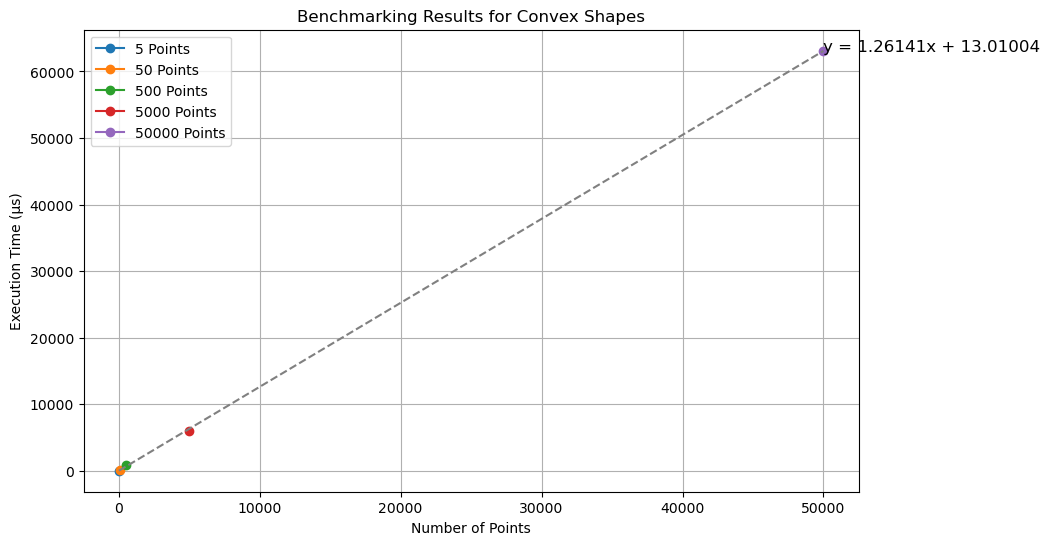

In [15]:
plot_benchmark_results(convex_data, "Convex Shapes")

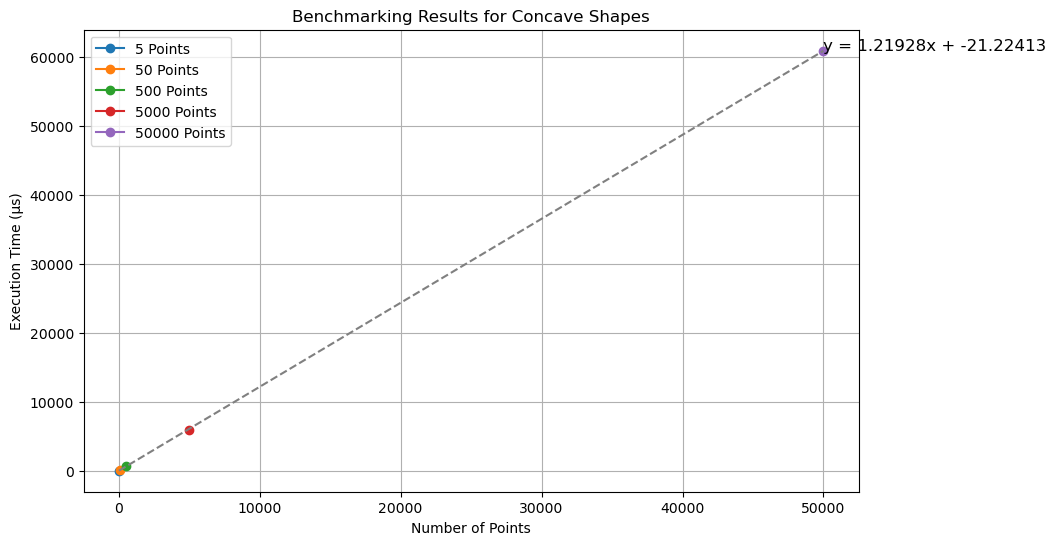

In [16]:
plot_benchmark_results(concave_data, "Concave Shapes")